### Визуализация с seaborn

* [1 - Линейный график](#1)
* [2 - Линейные графики в одних координатных осях](#2)
* [3 - Линейные графики в цикле (на разных координатных осях)](#3)
* [4 - PairPlot](#4)
* [5 - Гистограммы в одних координатных осях](#5)
* [6 - Линейный график с подсвеченным промежутком времени (зеленый прямоугольник)](#6)
* [7 - Точечные графики на одном полотне](#7)

### Описание данных

Датасет `vgsales.csv` содержит информацию о суммарных продажах видеоигр для игровых консолей. 

#### Описание признаков:

* `Rank` — порядковый номер записи в датасете.
* `Name` — наименование игры.
* `Platform` — платформа, для которой выпущена игра (Nintendo, PlayStation, XBox и другие).
* `Year` — год выпуска игры.
* `Genre` — жанр игры.
* `Publisher` — наименование компании-издателя игры.
* `NA_Sales` — объём продаж игры в Северной Америке, млн копий.
* `EU_Sales` — объём продаж игры в Европе, млн копий.
* `JP_Sales` — объём продаж игры в Японии, млн копий.
* `Other_Sales` — объём продаж игры в остальных странах, млн копий.
* `Global_Sales` — объём продаж игры по всему миру, млн копий.

### Загрузка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn')

In [2]:
df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


<a id='1'></a>

### 1 - Линейный график

Постройте линейный график динамики объёма продаж всех игр жанра «Sports» в Японии. Задайте графику размер 12 на 6.

In [3]:
data = df[df['Genre'] == 'Sports'].groupby('Year', as_index=False).agg('sum')
data.head()

,Year,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1980.0,4027,0.46,0.03,0.00,0.01,0.49
1,1981.0,31315,0.74,0.04,0.00,0.00,0.79
2,1982.0,7660,0.98,0.06,0.00,0.02,1.05
3,1983.0,422,0.73,0.10,2.35,0.02,3.20
4,1984.0,1055,1.70,0.39,4.02,0.06,6.18


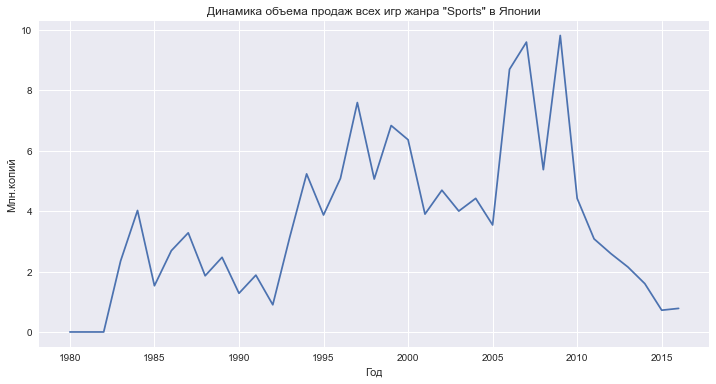

In [4]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=data, x='Year', y='JP_Sales', ax=ax)

plt.title('Динамика объема продаж всех игр жанра "Sports" в Японии')
plt.xlabel('Год')
plt.ylabel('Млн.копий')

plt.show()

<a id='2'></a>

### 2 - Линейные графики в одних координатных осях

В одних координатных осях постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

In [5]:
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
data.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.0,20153,2.82,0.18,0.0,0.03,3.02
1981.0,16815,7.95,0.46,0.0,0.08,8.50
1982.0,19454,1.75,0.11,0.0,0.03,1.86
1983.0,12903,1.81,0.11,0.0,0.02,1.94
1984.0,6298,0.26,0.01,0.0,0.00,0.27


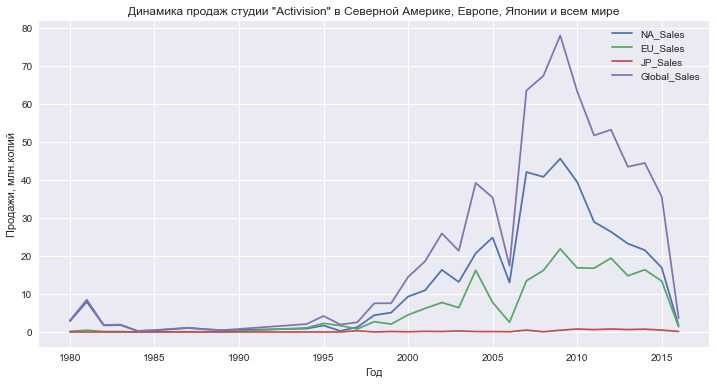

In [6]:
fig, ax = plt.subplots(figsize=(12,6))

sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for i in sales:
    sns.lineplot(data=data, x='Year', y=i, label=i, ax=ax)
    
ax.set_title('Динамика продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи, млн.копий')
ax.legend()

plt.show()

<a id='3'></a>

### 3 - Линейные графики в цикле (на разных координатных осях)

В цикле (т.е. на разных координатных осях) постройте линейные графики динамики продаж студии «Activision» в Северной Америке, Европе, Японии и во всем мире.

In [7]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [8]:
data = df[df['Publisher'] == 'Activision'].groupby('Year').agg('sum')
data.head()

,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Year,,,,,,
1980.0,20153,2.82,0.18,0.0,0.03,3.02
1981.0,16815,7.95,0.46,0.0,0.08,8.50
1982.0,19454,1.75,0.11,0.0,0.03,1.86
1983.0,12903,1.81,0.11,0.0,0.02,1.94
1984.0,6298,0.26,0.01,0.0,0.00,0.27


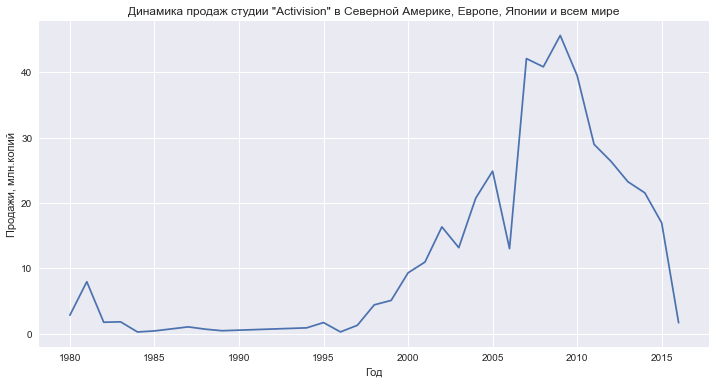

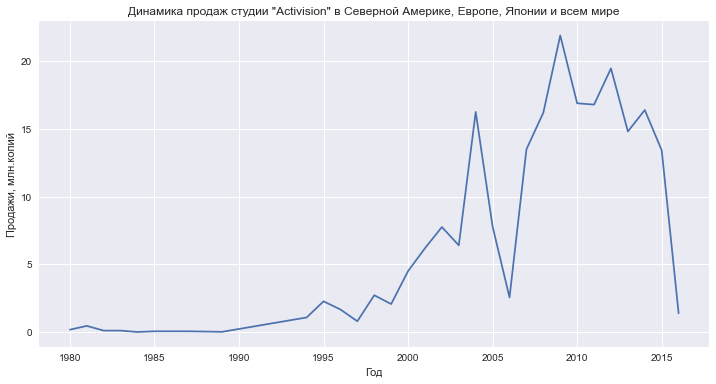

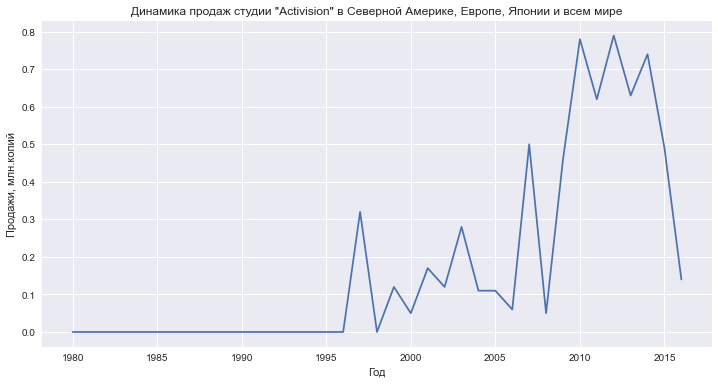

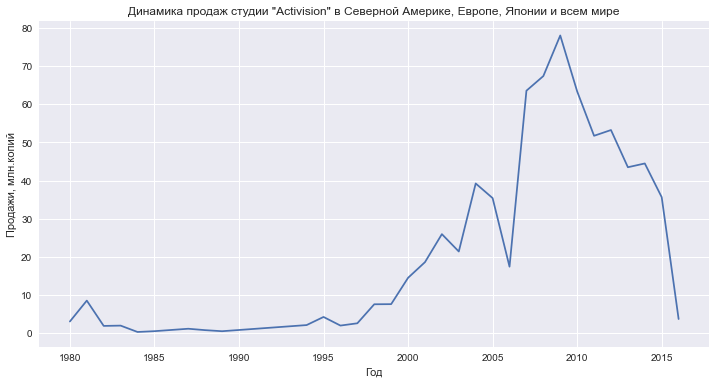

In [9]:
sales = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Global_Sales']

for i in sales:
    fig, ax = plt.subplots(figsize=(12,6))
    sns.lineplot(data=data, x='Year', y=i, ax=ax)
    
    ax.set_title('Динамика продаж студии "Activision" в Северной Америке, Европе, Японии и всем мире')
    ax.set_xlabel('Год')
    ax.set_ylabel('Продажи, млн.копий')

plt.show()

<a id='4'></a>

### 4 - PairPlot

Постройте PairPlot для всех численных признаков датасета. Разным цветом укажите цвета для разных платформ.

Примечание: при построении этого графика pandas может выдавать предупреждения (warnings), в этой задаче такое поведение допустимо.

In [10]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


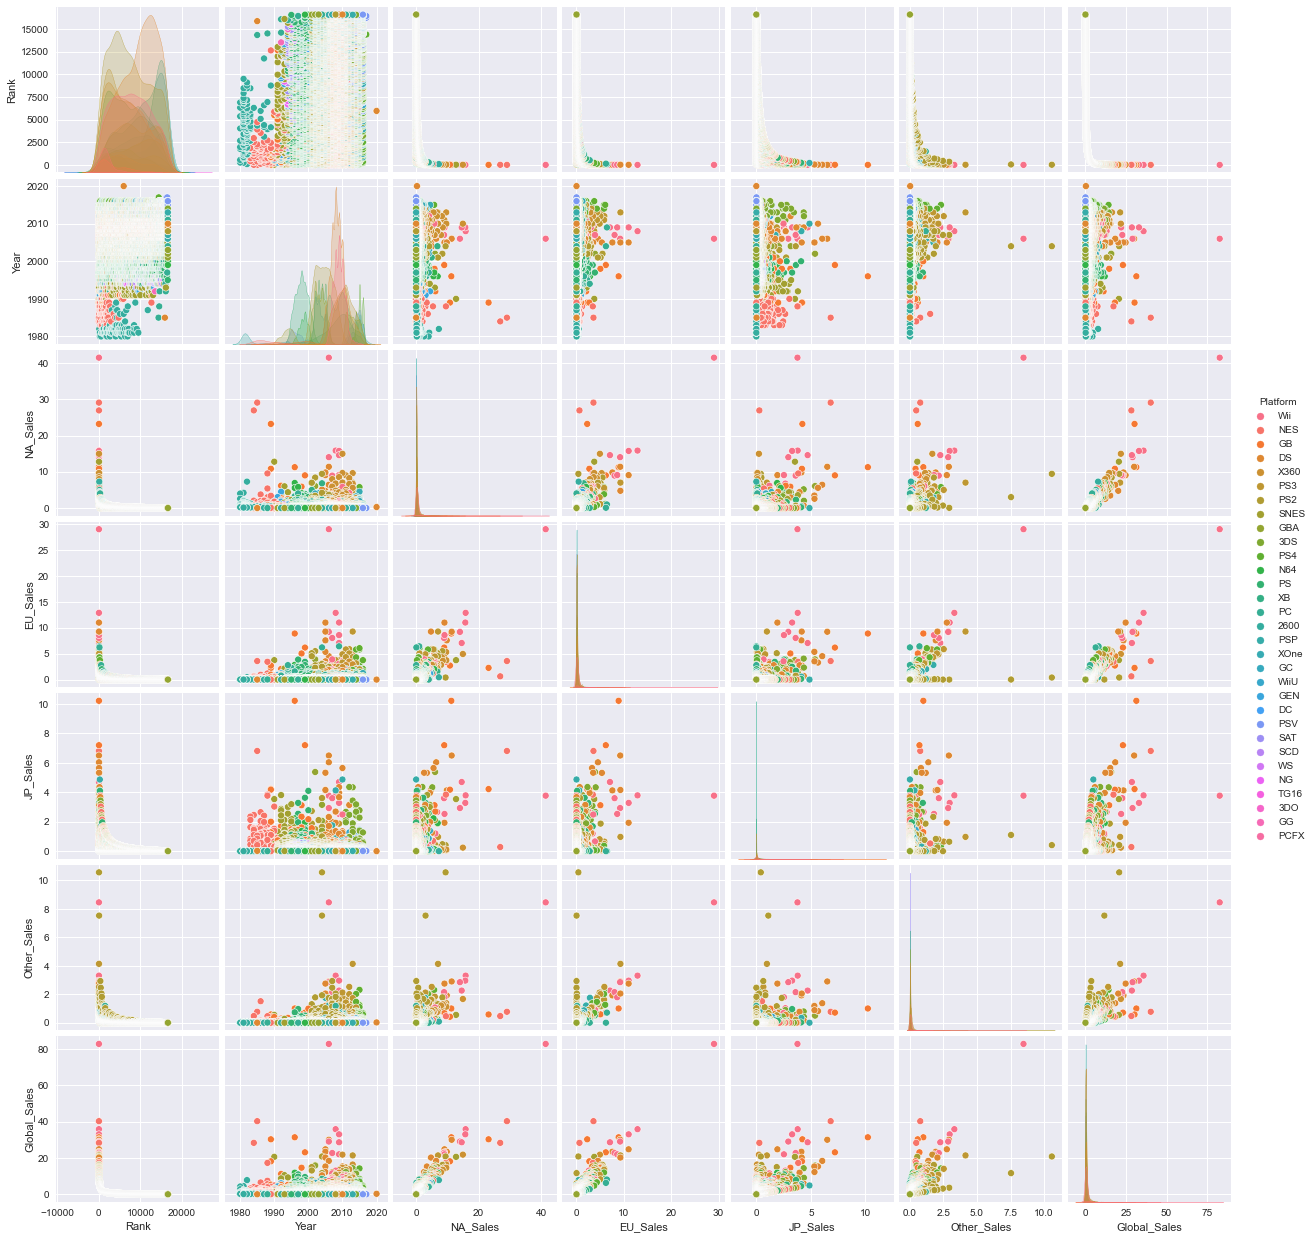

In [11]:
sns.pairplot(df, hue='Platform')

<a id='5'></a>

### 5 - Гистограммы в одних координатных осях

В одной координатной сетке постройте 2 гистограммы распредения мировых продаж игр издателей «Microsoft Game Studios» и «Take-Two Interactive» после 2010 года (включая 2010 год). Графики сделайте полупрозрачными, отсечки должны быть общими и соответствовать ширине столбцов обоих графиков.

In [12]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [13]:
df1 = df[df['Publisher'].isin(['Microsoft Game Studios', 'Take-Two Interactive']) & (df['Year'] >= 2010)]
df1.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
23,24,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
44,45,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.98
62,63,Halo: Reach,X360,2010.0,Shooter,Microsoft Game Studios,7.03,1.98,0.08,0.78,9.88


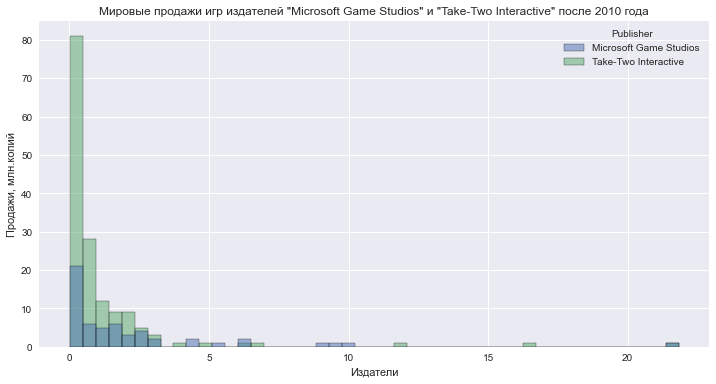

In [14]:
fig, ax = plt.subplots(figsize=(12,6))

ax = sns.histplot(data=df1, x='Global_Sales', hue='Publisher', ax=ax)

ax.set_title('Мировые продажи игр издателей "Microsoft Game Studios" и "Take-Two Interactive" после 2010 года')
ax.set_xlabel('Издатели')
ax.set_ylabel('Продажи, млн.копий')

plt.show()

<a id='6'></a>

### 6 - Линейный график с подсвеченным промежутком времени (зеленый прямоугольник)

Постройте линейный график динамики количества игр, выпускаемых Nintendo, по годам. С помощью numpy или pandas определите промежуток, в который издатель каждый год выпускал больше 35 игр, и подсветите этот промежуток времени с помощью зелёного полупрозрачного прямоугольника.

In [15]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [16]:
df1 = df[df['Publisher'] == 'Nintendo'].fillna(0).sort_values(by='Year')  # избавляемся от нанов
out = df1['Year'].isin(range(1, 2021))  # избавляемся от нулей
df1 = df1[out]
a = round(df1['Year'].max())
b = round(df1['Year'].min())
data = []  # кол-во игр
data2 = [] # годы
for i in range(b, a):
    data.append(df1[df1['Year'] == i].shape[0]) # кол-во строк
    data2.append(i)
df2 = pd.DataFrame({'Year': data2, 'Games': data})
df2.head()

,Year,Games
0,1983,6
1,1984,9
2,1985,7
3,1986,6
4,1987,4


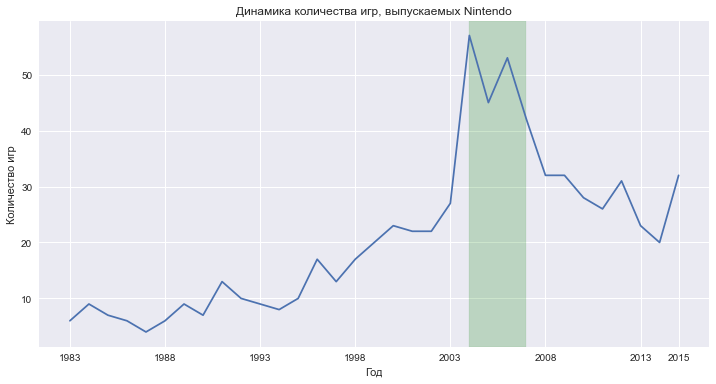

In [17]:
fig, ax = plt.subplots(figsize=(12,6))

ind = df2.index[df2['Games'] >= 35]

# ind[0], а не 0, чтобы начинать с первого элемента, а не с нуля:

first = ind[0]
second = ind[0]

for i in range(1, len(ind)):
    if ind[i] - ind[i - 1] != 1:
        second = ind[i - 1]
        ax.axvspan(xmin=df2['Year'][first], xmax=df2['Year'][second], color='green', alpha=0.2)
        first = ind[i]
second = ind[len(ind) - 1]

# Чтобы увидеть последний промежуток:

ax.axvspan(xmin=df2['Year'][first], xmax=df2['Year'][second], color='green', alpha=0.2)
sns.lineplot(data=df2, x='Year', y='Games', ax=ax) 

plt.title('Динамика количества игр, выпускаемых Nintendo')
plt.xlabel('Год')
plt.ylabel('Количество игр')
ax.set_xticks(list(range(int(df2['Year'].min()), int(df2['Year'].max()), 5)) + [int(df2['Year'].max())])

plt.show()

In [18]:
# 2-й вариант:

plot_data = df[df['Publisher'] == 'Nintendo'].groupby('Year').count().reset_index()
plot_data.head()

,Year,Rank,Name,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1983.0,6,6,6,6,6,6,6,6,6,6
1,1984.0,9,9,9,9,9,9,9,9,9,9
2,1985.0,7,7,7,7,7,7,7,7,7,7
3,1986.0,6,6,6,6,6,6,6,6,6,6
4,1987.0,4,4,4,4,4,4,4,4,4,4


In [19]:
start_year = plot_data[plot_data['Global_Sales'] > 35]['Year'].min()
end_year = plot_data[plot_data['Global_Sales'] > 35]['Year'].max()
start_year, end_year

(2004.0, 2007.0)

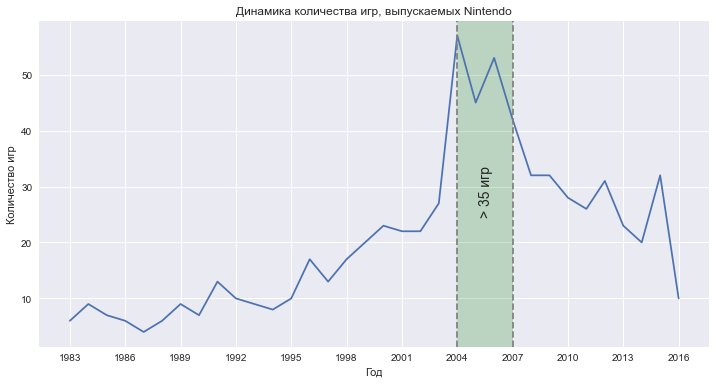

In [20]:
fig, ax = plt.subplots(figsize=(12,6))
sns.lineplot(data=plot_data, x='Year', y='Global_Sales', ax=ax) 

ax.set_xticks(np.append(np.arange(plot_data['Year'].min(), plot_data['Year'].max(), 3), plot_data['Year'].max()))
ax.axvspan(xmin=start_year, xmax=end_year, color='green', alpha=0.2)
ax.axvline(start_year, color='gray', ls='--')
ax.axvline(end_year, color='gray', ls='--')

ax.set_title('Динамика количества игр, выпускаемых Nintendo')
ax.set_xlabel('Год')
ax.set_ylabel('Количество игр')

ax.axes.text(2005.2, 25, '> 35 игр', rotation=90, fontsize=14)

plt.show()

<a id='7'></a>

### 7 - Точечные графики на одном полотне

Определите 3 жанра и 4 платформы с самыми большими продажами игр в мире за всё время. Постройте сетку графиков 4 на 3, в каждой ячейке постройте точечный график, проверяющий зависимость общемировых продаж от продаж в Северной Америке для каждой пары (жанра, платформы). Разными цветами укажите игры разных годов. Размер итогового полотна определите самостоятельно таким образом, чтобы все графики были видны.

Делайте графики достаточно читаемыми, чтобы из них можно было сделать вывод о наличии / отсутствии зависимостей в данных.

In [21]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [22]:
df1 = df.groupby('Genre').agg('sum').sort_values('Global_Sales', ascending=False).head(3)
df1

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,
Action,26441383,6531731.0,877.83,525.00,159.95,187.38,1751.18
Sports,17419112,4620621.0,683.35,376.85,135.37,134.97,1330.93
Shooter,9653872,2571588.0,582.60,313.27,38.28,102.69,1037.37


In [23]:
data1 = df1.index
data1

Index(['Action', 'Sports', 'Shooter'], dtype='object', name='Genre')

In [24]:
df2 = df.groupby('Publisher').agg('sum').sort_values('Global_Sales', ascending=False).head(4)
df2

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
Nintendo,2714164,1394666.0,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,7140412,2686562.0,595.07,371.27,14.04,129.77,1110.32
Activision,6368325,1938979.0,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,4105604,1367034.0,265.22,187.72,74.10,80.45,607.50


In [25]:
data2 = df2.index
data2

Index(['Nintendo', 'Electronic Arts', 'Activision',
       'Sony Computer Entertainment'],
      dtype='object', name='Publisher')

In [26]:
data3 = df[df['Genre'].isin(data1)]
data3.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
13,14,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [27]:
data3 = data3[data3['Publisher'].isin(data2)][['Platform', 'Genre', 'Year', 'Global_Sales', 'NA_Sales']]
data3.head()

,Platform,Genre,Year,Global_Sales,NA_Sales
0,Wii,Sports,2006.0,82.74,41.49
3,Wii,Sports,2009.0,33.00,15.75
9,NES,Shooter,1984.0,28.31,26.93
13,Wii,Sports,2007.0,22.72,8.94
14,Wii,Sports,2009.0,22.00,9.09


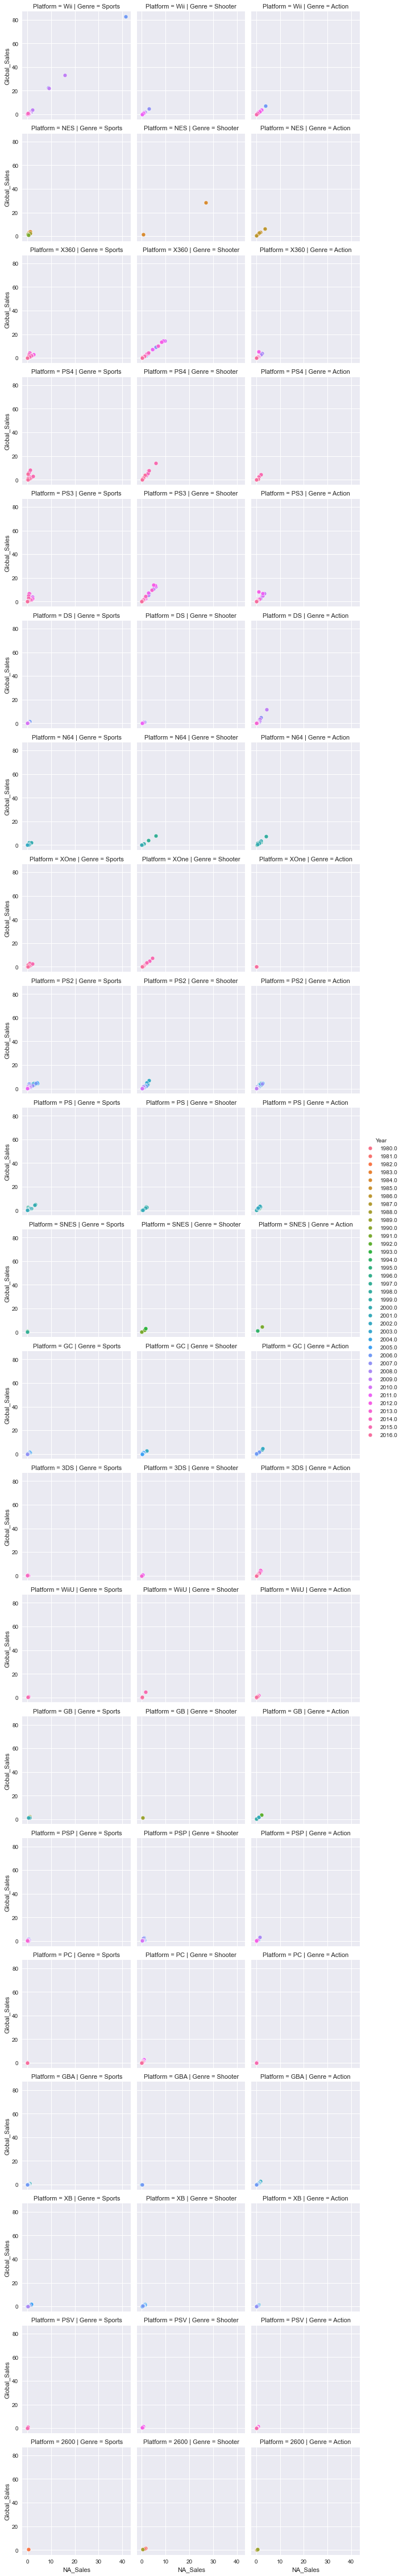

In [28]:
g = sns.FacetGrid(data3, row='Platform', col='Genre', hue='Year')
g.map(sns.scatterplot, 'NA_Sales', 'Global_Sales')
g.add_legend()